# Data Pre-Processing

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\Coco\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2. Load Dataset

In [2]:
df = pd.read_csv('heart.csv')

### 3. Handle Missing Values

In [3]:
## Impute missing values for numerical features with the mean
num_imputer = SimpleImputer(strategy='mean')
df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = num_imputer.fit_transform(df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

## Impute missing values for categorical features with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = cat_imputer.fit_transform(df[['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

### 4. Encode Categorical Features

In [4]:
## Use one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

### 5. Scale Numerical Features

In [5]:
## Standardize
scaler = StandardScaler()
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

### 6. Visualize Class Imbalance

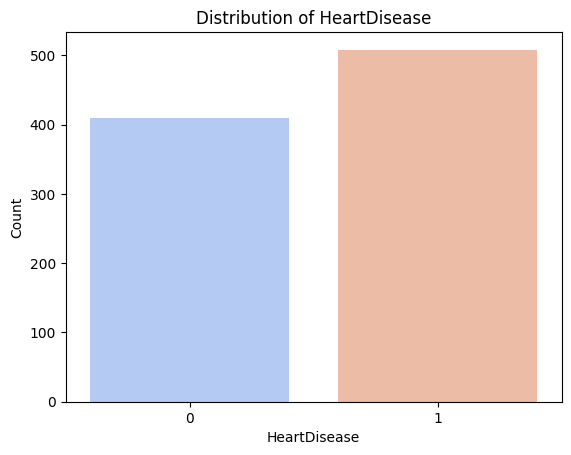

In [6]:
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease', palette='coolwarm', dodge=False, legend=False)
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

### 7. Split Data 

In [7]:
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (642, 15)
Testing Data: (276, 15)


# Visualization

### 1. Distribution Visualizations

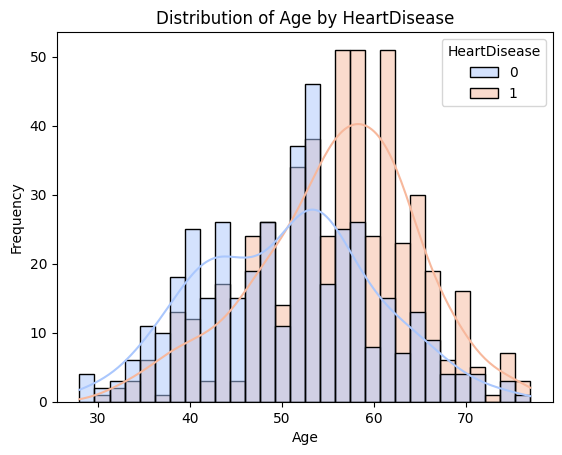

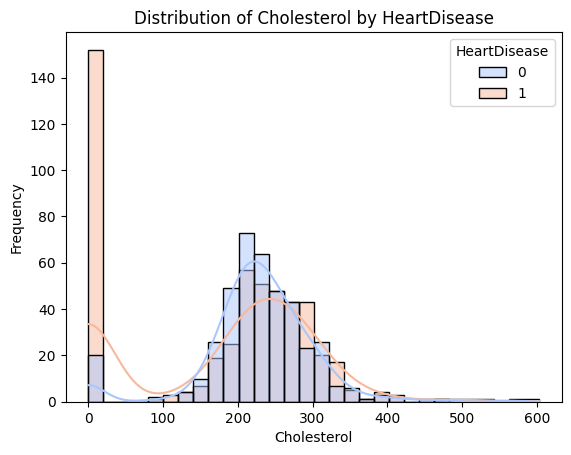

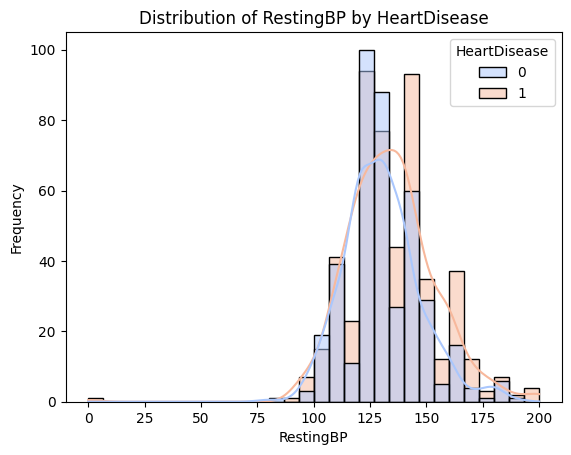

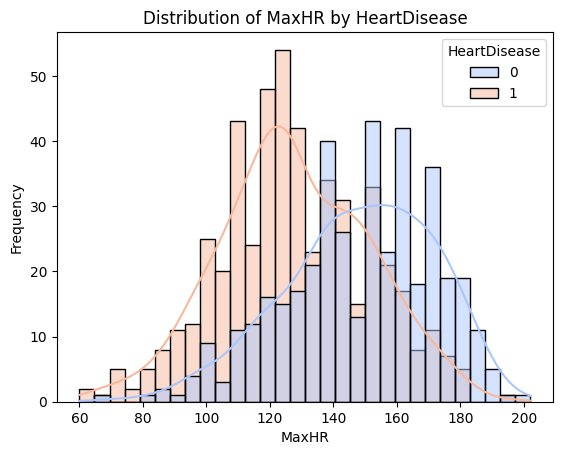

In [8]:
## Histograms with KDE 
for col in ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']:
    sns.histplot(data=df, x=col, kde=True, hue='HeartDisease', palette='coolwarm', bins=30)
    plt.title(f'Distribution of {col} by HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

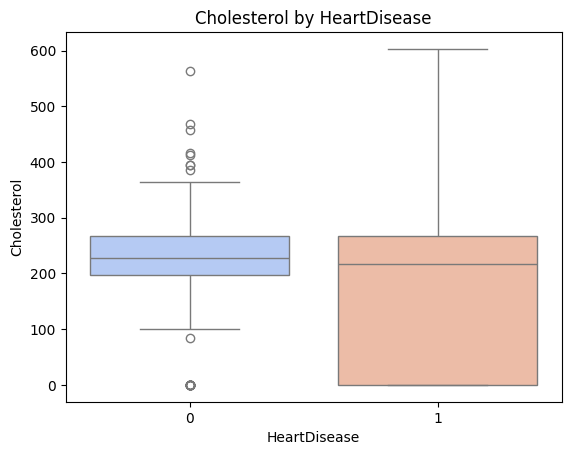

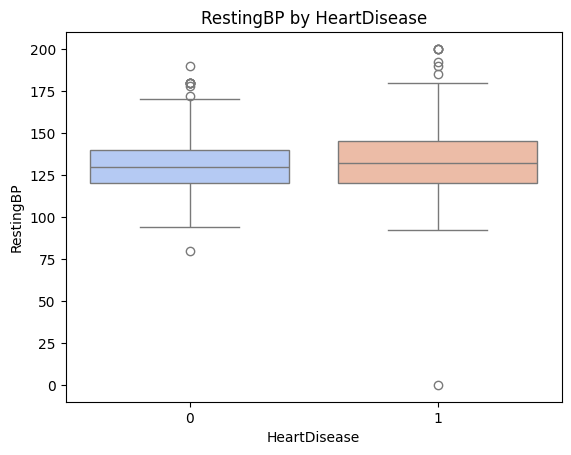

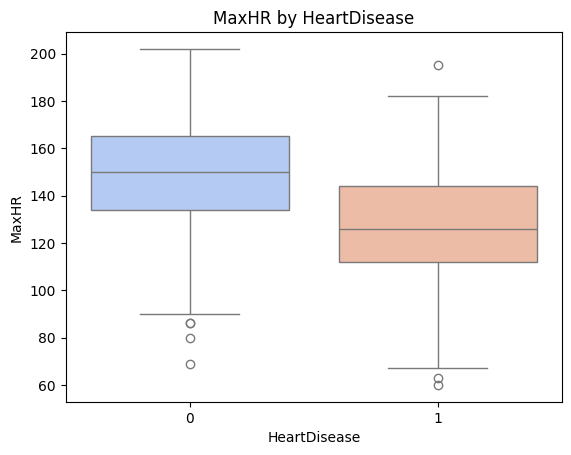

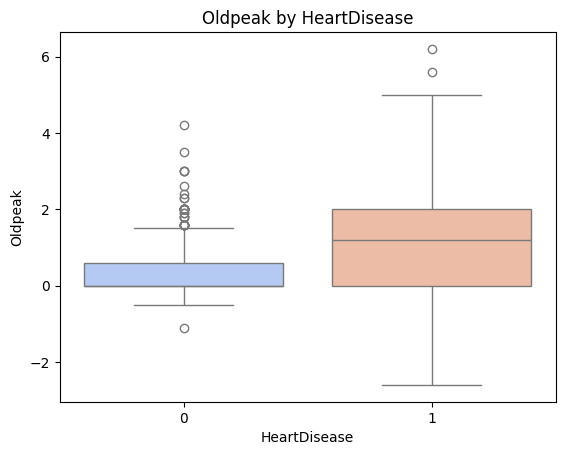

In [9]:
## Box Plots
for col in ['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']:
    sns.boxplot(data=df, x='HeartDisease', y=col, hue='HeartDisease', palette='coolwarm', dodge=False, legend=False)
    plt.title(f'{col} by HeartDisease')
    plt.xlabel('HeartDisease')
    plt.ylabel(col)
    plt.show()

### 2. Relationship Visualizations 

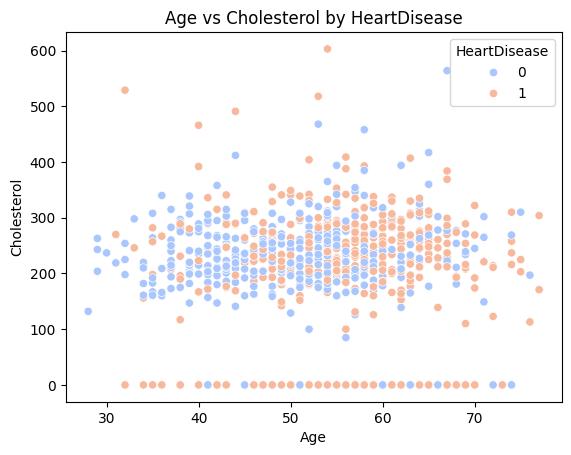

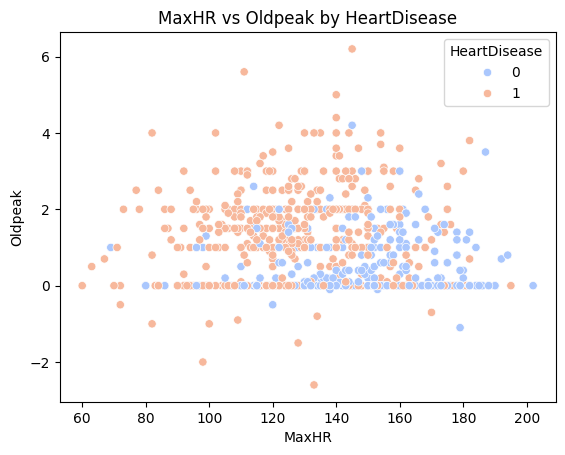

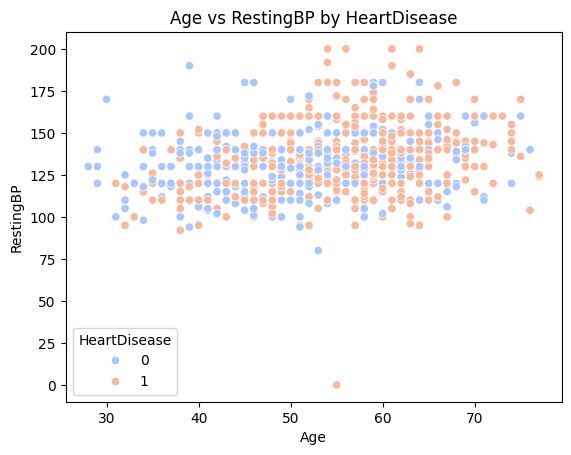

In [10]:
## Scatter Plots
## Age vs Cholesterol
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease', palette='coolwarm')
plt.title('Age vs Cholesterol by HeartDisease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

## MaxHR vs Oldpeak
sns.scatterplot(data=df, x='MaxHR', y='Oldpeak', hue='HeartDisease', palette='coolwarm')
plt.title('MaxHR vs Oldpeak by HeartDisease')
plt.xlabel('MaxHR')
plt.ylabel('Oldpeak')
plt.show()

## RestingBP vs Age
sns.scatterplot(data=df, x='Age', y='RestingBP', hue='HeartDisease', palette='coolwarm')
plt.title('Age vs RestingBP by HeartDisease')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

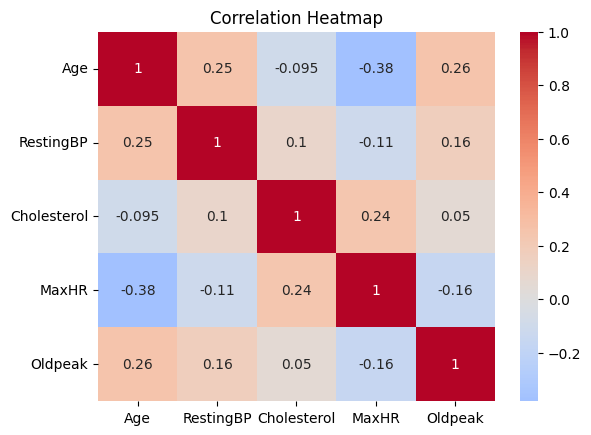

In [11]:
## Correlation Heatmap
sns.heatmap(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### 3. Trend Analysis

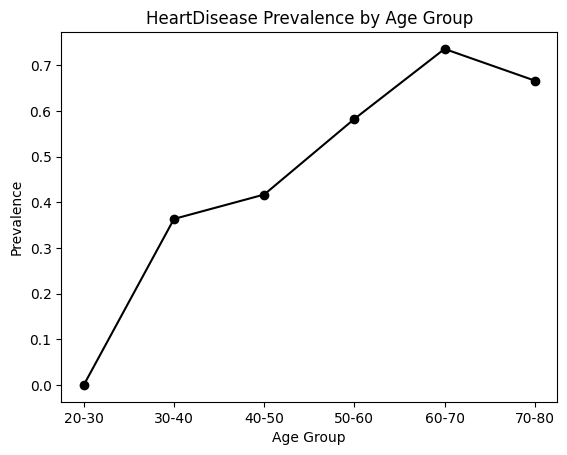

In [12]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

## Calculate HeartDisease prevalence by AgeGroup
AgeGroup_trends = df.groupby('AgeGroup', observed=False)['HeartDisease'].mean()

## Line Graph
AgeGroup_trends.plot(kind='line', marker='o', color='black')
plt.title('HeartDisease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.show()

### 5. Categorical Visualizations

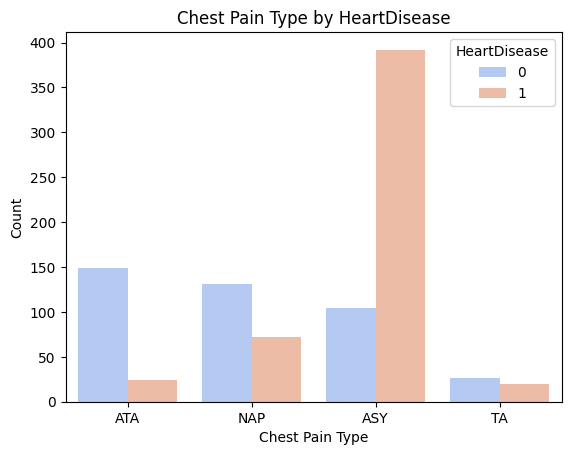

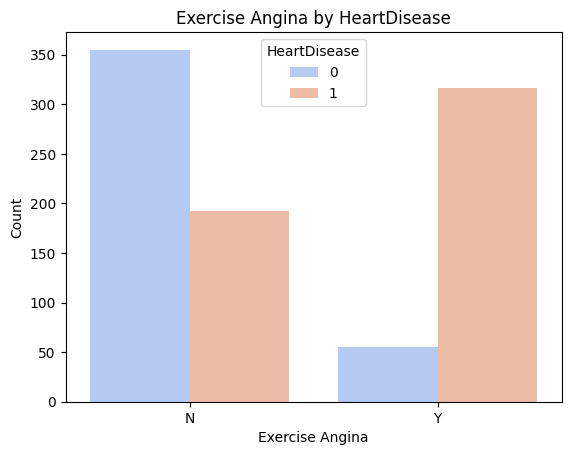

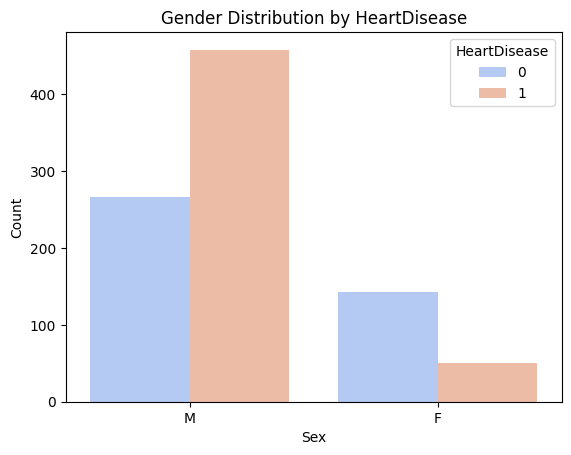

In [13]:
## Stacked Bar Charts
## ChestPainType vs HeartDisease
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='coolwarm')
plt.title('Chest Pain Type by HeartDisease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='HeartDisease')
plt.show()

## ExerciseAngina vs HeartDisease
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', palette='coolwarm')
plt.title('Exercise Angina by HeartDisease')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')
plt.legend(title='HeartDisease')
plt.show()

## Sex vs HeartDisease
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='coolwarm')
plt.title('Gender Distribution by HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='HeartDisease')
plt.show()

### 6. KDE Plots

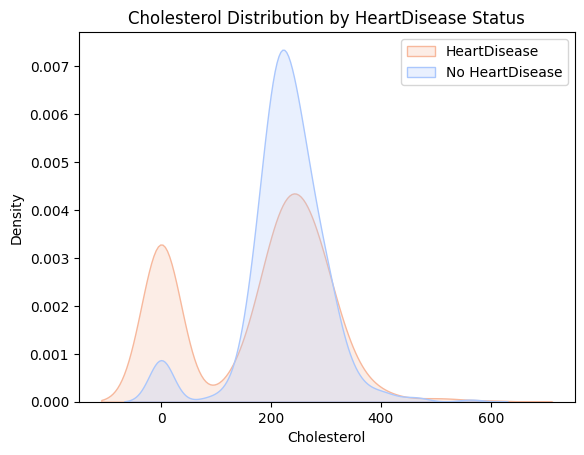

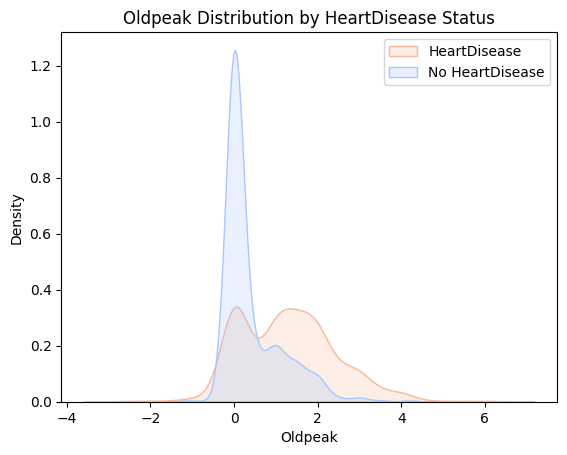

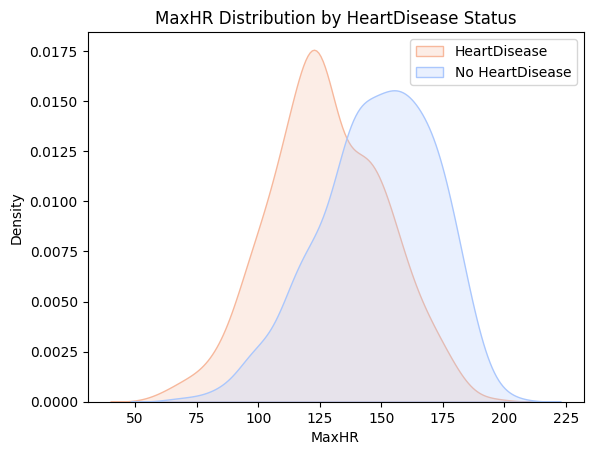

In [14]:
colors = sns.color_palette("coolwarm", 2)

## Cholesterol
sns.kdeplot(data=df[df['HeartDisease'] == 1]['Cholesterol'], label='HeartDisease', fill=True, color=colors[1])
sns.kdeplot(data=df[df['HeartDisease'] == 0]['Cholesterol'], label='No HeartDisease', fill=True, color=colors[0])
plt.title('Cholesterol Distribution by HeartDisease Status')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.legend()
plt.show()

## Oldpeak
sns.kdeplot(data=df[df['HeartDisease'] == 1]['Oldpeak'], label='HeartDisease', fill=True, color=colors[1])
sns.kdeplot(data=df[df['HeartDisease'] == 0]['Oldpeak'], label='No HeartDisease', fill=True, color=colors[0])
plt.title('Oldpeak Distribution by HeartDisease Status')
plt.xlabel('Oldpeak')
plt.ylabel('Density')
plt.legend()
plt.show()

## MaxHR
sns.kdeplot(data=df[df['HeartDisease'] == 1]['MaxHR'], label='HeartDisease', fill=True, color=colors[1])
sns.kdeplot(data=df[df['HeartDisease'] == 0]['MaxHR'], label='No HeartDisease', fill=True, color=colors[0])
plt.title('MaxHR Distribution by HeartDisease Status')
plt.xlabel('MaxHR')
plt.ylabel('Density')
plt.legend()
plt.show()

# Modeling

### Baseline Model - Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## Train 
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

## Make predictions
y_pred_baseline = baseline_model.predict(X_test)
y_prob_baseline = baseline_model.predict_proba(X_test)[:, 1]

## Evaluate
print("Baseline Model - Logistic Regression")
print(classification_report(y_test, y_pred_baseline))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_baseline))

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
print("Confusion Matrix:")
print(conf_matrix)

Baseline Model - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       123
           1       0.88      0.92      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

AUC-ROC Score: 0.9350124873797758
Confusion Matrix:
[[104  19]
 [ 13 140]]


### Advanced Model - Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

## Train 
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

## Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

## Evaluate
print("Advanced Model - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_rf))

## Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Advanced Model - Random Forest
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

AUC-ROC Score: 0.9469153515064562
Confusion Matrix:
[[106  17]
 [ 13 140]]


### Advanced Model - XGBoost

In [17]:
from xgboost import XGBClassifier

## Train 
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')  # Removed use_label_encoder
xgb_model.fit(X_train, y_train)

## Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

## Evaluate 
print("Advanced Model - XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_xgb))

## Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

Advanced Model - XGBoost
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.88      0.90      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276

AUC-ROC Score: 0.9351187629523354
Confusion Matrix:
[[105  18]
 [ 16 137]]


### Advanced Model - Support Vector Machine

In [18]:
from sklearn.svm import SVC

## Train 
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

## Make predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

## Evaluate
print("Advanced Model - Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_svm))

## Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Advanced Model - Support Vector Machine
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       123
           1       0.90      0.94      0.92       153

    accuracy                           0.91       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276

AUC-ROC Score: 0.9451086667729423
Confusion Matrix:
[[107  16]
 [  9 144]]


### Advanced Model - Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

## Train
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

## Make predictions
y_pred_gbc = gbc_model.predict(X_test)
y_prob_gbc = gbc_model.predict_proba(X_test)[:, 1]

## Evaluate 
print("Advanced Model - Gradient Boosting")
print(classification_report(y_test, y_pred_gbc))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_gbc))

## Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix_gbc)

Advanced Model - Gradient Boosting
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       123
           1       0.90      0.90      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

AUC-ROC Score: 0.9395823369998406
Confusion Matrix:
[[108  15]
 [ 16 137]]


### 1. Evaluation Metrics

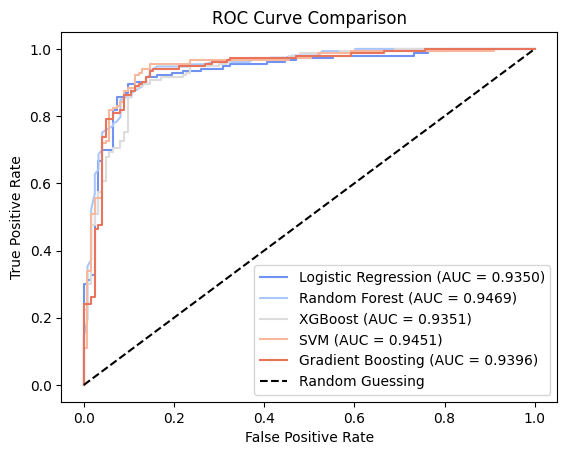

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

colors = sns.color_palette("coolwarm", 5)

## Calculate ROC curves
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_prob_baseline)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_prob_gbc)

## Plot ROC curves
plt.plot(fpr_baseline, tpr_baseline, label="Logistic Regression (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob_baseline)), color=colors[0])
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob_rf)), color=colors[1])
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob_xgb)), color=colors[2])
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob_svm)), color=colors[3])
plt.plot(fpr_gbc, tpr_gbc, label="Gradient Boosting (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob_gbc)), color=colors[4])
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### 2. Feature Importance 

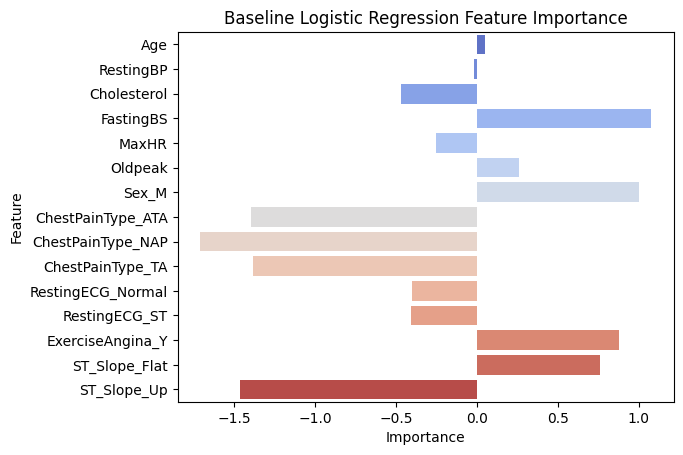

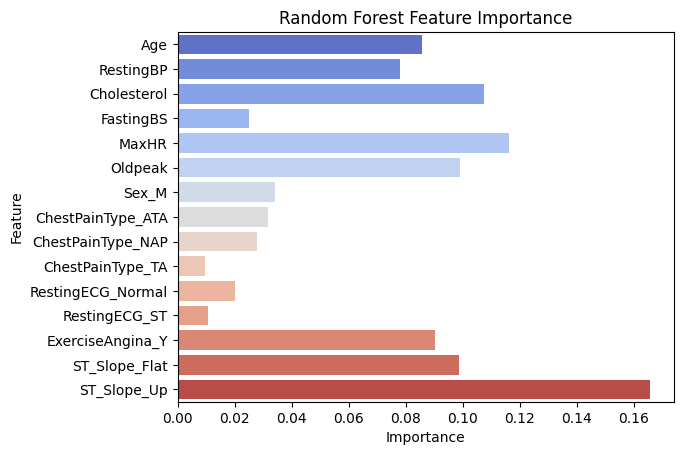

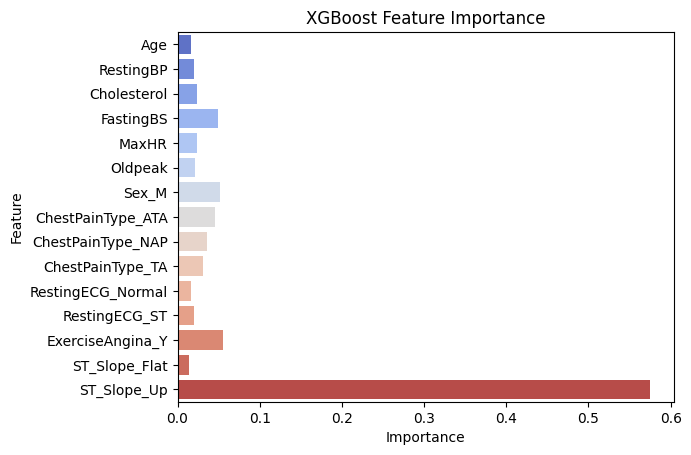

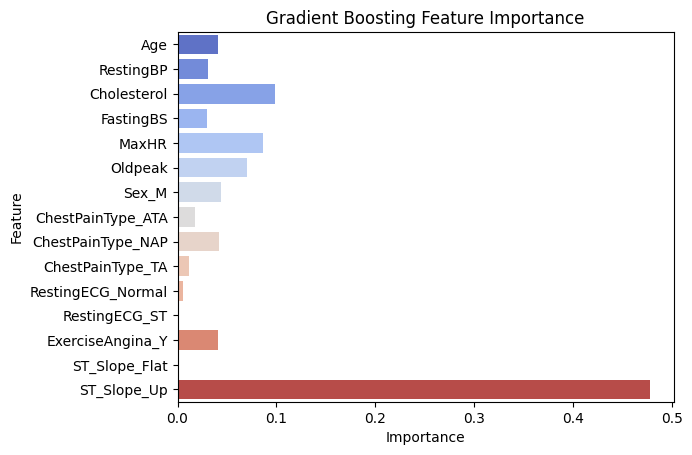

In [26]:
## Logistic Regression Feature Importance
logistic_coefficients = baseline_model.coef_[0] 

sns.barplot(
    x=logistic_coefficients, 
    y=X.columns, 
    palette=sns.color_palette("coolwarm", len(X.columns)),  
    dodge=False,
    hue=X.columns,  
    legend=False  
)
plt.title("Baseline Logistic Regression Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Random Forest Feature Importance
sns.barplot(
    x=rf_model.feature_importances_,
    y=X.columns,
    hue=X.columns,
    palette=sns.color_palette("coolwarm", len(X.columns)), 
    dodge=False,
    legend=False
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## XGBoost Feature Importance
sns.barplot(
    x=xgb_model.feature_importances_,
    y=X.columns,
    hue=X.columns,
    palette=sns.color_palette("coolwarm", len(X.columns)), 
    dodge=False,
    legend=False
)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Gradient Boosting Feature Importance
sns.barplot(
    x=gbc_model.feature_importances_,
    y=X.columns,
    hue=X.columns,
    palette=sns.color_palette("coolwarm", len(X.columns)), 
    dodge=False,
    legend=False
)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

SVM does not inherently provide feature importance for non-linear kernels such as RBF, as it relies on support vectors and kernel functions rather than direct feature weights. While methods such as SHAP or permutation importance can estimate feature importance, they require additional computation. Given this complexity, feature importance is omitted for SVM.

#### Based on the ROC curve comparison and feature importance analysis, Random Forest outperformed all other advanced models, demonstrating its superior performance. Therefore, we prioritize further optimization of the Random Forest model to enhance its performance.

### 3. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required in a leaf node
}

## Perform grid search cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',                     
    cv=5,                               
    verbose=2,
    n_jobs=-1                             
)

## Fit grid search to the training data
grid_search.fit(X_train, y_train)

## Extract the best model and parameters
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Optimized Model - Random Forest
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.88      0.89       276
weighted avg       0.89      0.89      0.89       276

AUC-ROC Score: 0.9485094850948509
Confusion Matrix:
[[105  18]
 [ 13 140]]


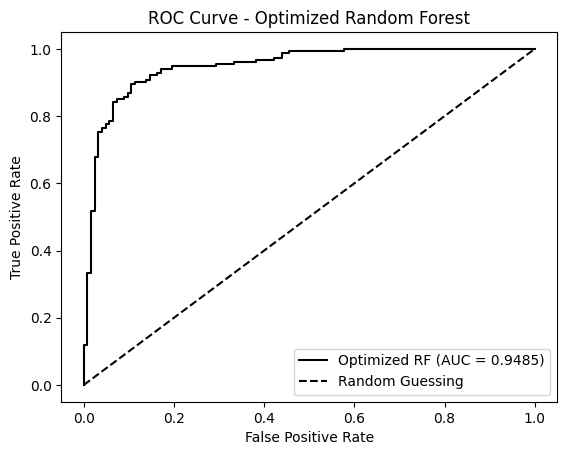

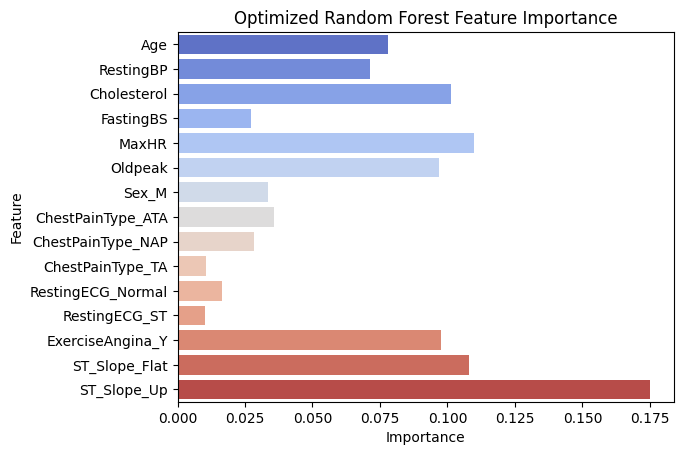

In [29]:
## Retrain the Random Forest model with the best hyperparameters
optimized_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
optimized_rf_model.fit(X_train, y_train)

## Make predictions
y_pred_optimized_rf = optimized_rf_model.predict(X_test)
y_prob_optimized_rf = optimized_rf_model.predict_proba(X_test)[:, 1]

## Evaluate 
print("Optimized Model - Random Forest")
print(classification_report(y_test, y_pred_optimized_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_optimized_rf))

## Confusion Matrix
conf_matrix_optimized_rf = confusion_matrix(y_test, y_pred_optimized_rf)
print("Confusion Matrix:")
print(conf_matrix_optimized_rf)

## Plot ROC Curve
fpr_optimized_rf, tpr_optimized_rf, _ = roc_curve(y_test, y_prob_optimized_rf)

plt.plot(fpr_optimized_rf, tpr_optimized_rf, label=f"Optimized RF (AUC = {roc_auc_score(y_test, y_prob_optimized_rf):.4f})", color="black")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.title("ROC Curve - Optimized Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Plot Feature Importance
feature_importances = optimized_rf_model.feature_importances_

sns.barplot(
    x=feature_importances,  
    y=X.columns, 
    palette=sns.color_palette("coolwarm", len(feature_importances)),  
    dodge=False,
    hue=X.columns,  
    legend=False  
)
plt.title("Optimized Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()